In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json
from pathlib import Path
import math
import scienceplots
import latex
from utils import plot_quad_plot

In [ ]:
def plot_quad_plot(fix_what, what_val, source, var_list, letter):
    means = {}
    std_devs = {}
    
    if fix_what == 'GA':
        for depth in var_list:
            filename = source + f"list{depth}_depth_{what_val}_gen.json"
            
            with open(filename) as json_file:
                reward = json.load(json_file)
                
            second_elements = [[t[1] for t in sublist] for sublist in reward]

            # Convert the nested lists to a NumPy array for efficient mean calculation
            second_elements_array = np.array(second_elements)
                            
            means[depth] = np.mean(second_elements_array, axis=1)   #[np.mean(l[1]) for l in reward]
            std_devs[depth] = np.std(second_elements_array, axis=1) #[np.std(l[1]) for l in reward]

        
        with plt.style.context(['no-latex']):
            plt.style.use(['no-latex'])
            fig, ax1 = plt.subplots()
            
            ax1.plot([2*i for i in range(0, 11)], means[3], color='#ffd700') 
            ax1.plot([2*i for i in range(0, 11)], means[5], color='#f45140') 
            ax1.plot([2*i for i in range(0, 11)], means[10], color='#10d209') 
            ax1.plot([2*i for i in range(0, 11)], means[13], color='#9d02d7') # #1aede9 #10d209
            
            ax1.fill_between([2*i for i in range(0, 11)], np.subtract(means[3], std_devs[3]), np.add(means[3], std_devs[3]), alpha=0.15, color='#ffd700')
            ax1.fill_between([2*i for i in range(0, 11)], np.subtract(means[5], std_devs[5]), np.add(means[5], std_devs[5]), alpha=0.15, color='#f45140')
            ax1.fill_between([2*i for i in range(0, 11)], np.subtract(means[10], std_devs[10]), np.add(means[10], std_devs[10]), alpha=0.15, color='#10d209')
            ax1.fill_between([2*i for i in range(0, 11)], np.subtract(means[13], std_devs[13]), np.add(means[13], std_devs[13]), alpha=0.15, color='#9d02d7')

            ax1.legend(['3', '5', '10', '13'], loc='lower right') #, bbox_to_anchor=(1, 1))
            
            #ticks = [2*i for i in range(1, 11)] + [10]
            ticks = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
            plt.xticks(ticks=ticks, labels=[i for i in range(0, 11)], fontname= 'Times New Roman', fontsize=14)
            plt.yticks(fontsize=14, fontname= 'Times New Roman')
            
            plt.xlabel('Generation Number', fontsize=16, fontname= 'Times New Roman')
            plt.ylabel('Total reward', fontsize=16, fontname= 'Times New Roman')
            #plt.title(f'Best rewards for different max depth values and GA strategy {what_val}')
            plt.ylim(bottom=-2, top=1.5)
            
            fig.suptitle(f'({letter}) {what_val}', y=-0.01, fontname= 'Times New Roman', weight ='bold', fontsize=16)
            
            plt.show()    

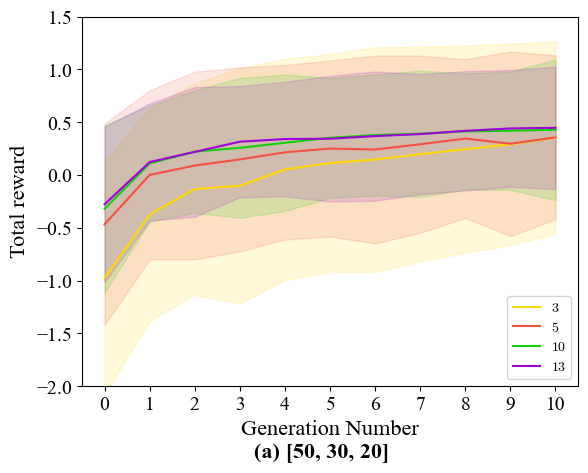

In [2]:
plot_quad_plot('GA', [50, 30, 20], '../full_heuristic_init/', [3, 5, 10, 13], 'a')

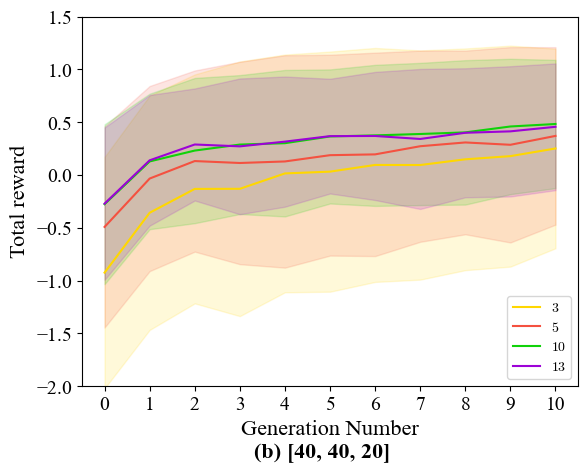

In [3]:
plot_quad_plot('GA', [40, 40, 20], '../full_heuristic_init/', [3, 5, 10, 13], 'b') 

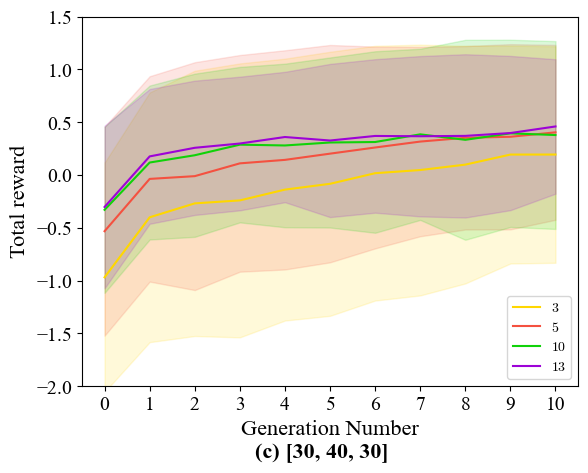

In [4]:
plot_quad_plot('GA', [30, 40, 30], '../full_heuristic_init/', [3, 5, 10, 13], 'c') 

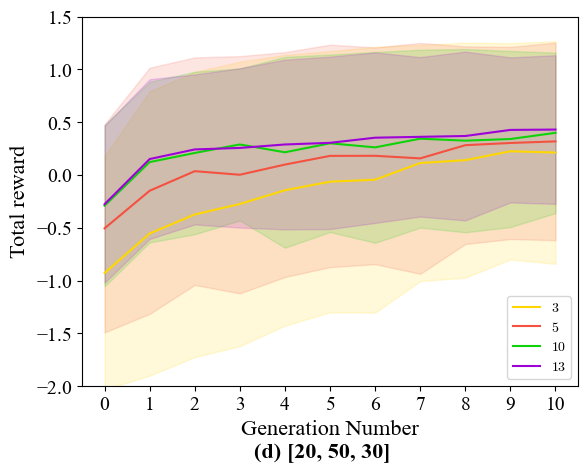

In [5]:
plot_quad_plot('GA', [20, 50, 30], '../full_heuristic_init/', [3, 5, 10, 13], 'd') 

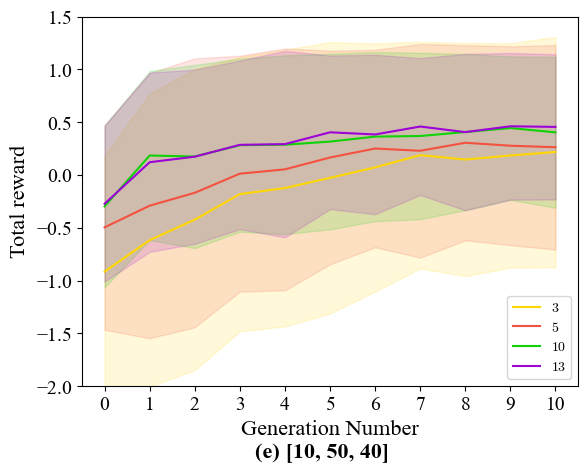

In [6]:
plot_quad_plot('GA', [10, 50, 40], '../full_heuristic_init/', [3, 5, 10, 13], 'e') 